#**Como usei Python para ir Além da Localização: Desvendando a precificação e a profissionalização do Airbnb em NYC.**
# -Análise dos Dados do Airbnb - *Nova York*

Depois de uma boa preparação, você prestou o processo seletivo para trabalhar na renomada empresa de aluguel de espaços, chamada **Airbnb**. Após a primeira semana de recepção, você se junta ao **time de Analista de Dados** com foco em expansão da empresa, na cidade de Nova York, Estados Unidos.


---


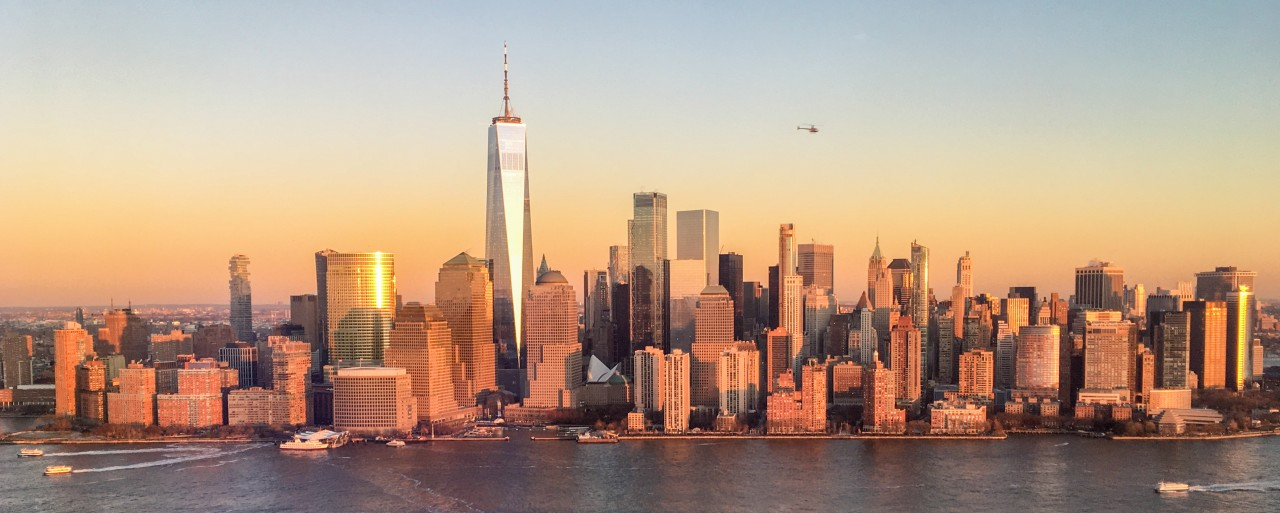



##**PROPOSTA**

- Conectar viajantes que buscam uma hospedagem com o melhor custo benefício, com os anfitriões que desejam alugar seus imóveis, tudo isso de forma rápida, prática e segura para ambos os lados.

-Analisar a dinâmica de preços do mercado de NY para identificar a saturação do mercado turístico e oportunidades no segmento corporativo/luxo, diferenciando a atuação de anfitriões profissionais vs. amadores

- **Analisar os dados referentes à cidade de Nova Iorque de 2019**, e ver consegue extrair ao máximo dos dados brutos e nos entregarem **business insights** dele após serem tratados e analisados.

##**IMPORTANCIA**

- Esse projeto de expansão é muito importante para o Airbnb, mas também é muito arriscado pois qualquer decisão errada  pode levar a empresa a ter um prejuízo enorme, para diminuir o risco desse projeto, o seu chefe pediu para você auxiliar o CEO da empresa, utilizando dados para responder algumas perguntas, que o ajudarão a **tomar melhores decisões comerciais e de marketing**.





Neste notebook, iremos analisar os dados referentes à cidade de Nova Iorque, e ver o que os dados brutos nos entregam após serem tratados e analisados.

##**PASSOS NECESSÁRIOS:**


*   Obtenção dos Dados
*   *Análise Exploratória dos Dados  (EDA)*
*   *Limpeza e Tratamento dos Dados*
*   *Engenharia de Atributo e Extração de Insights*
*   *Visualização e Analise dos Dados*




# **Obtenção dos Dados**

In [55]:
!pip install pywaffle -q

In [56]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
import numpy as np
from PIL import Image
import folium
from folium import plugins
from folium.plugins import HeatMap

# Datetime
from datetime import datetime
%matplotlib inline
sns.set()

In [ ]:
df = pd.read_csv('/content/AB_NYC_2019.csv')

# **Análise Exploratória dos Dados (EDA)**

Agora vamos conhecer a situação atual dos dados e entender sua estrutura.

Para darmos início na nossa análise, vamos verificar a cara do nosso dataset, conferindo as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

## **Dicionário de Variáveis**

Para facilitar a compreensão dos dados, o dicionário de variáveis nos entrega o significado de cada uma das colunas presentes do dataset.

  - `id` - Número de Id gerado para identificar o imóvel.
  - `name` - Nome do imóvel anunciado
  - `host_id` - Número de Id gerado para identificar o anfitrião.
  - `host_name` - Nome do anfitrião.
  - `neighbourhood_group` - Nome do distrito.
  - `neighbourhood` - Nome do Bairro
  - `latitude` - Coordenada geográfica referente à latitude do imóvel.
  - `longitude` - Coordenada geográfica referente à longitude do imóvel.
  - `room_type` - Tipo do quarto/imóvel.
  - `price` - Preço da diária.
  - `minimum_nights` - Minimo de noites exigidas para locar o imóvel.
  - `number_of_reviews` - Número de avaliação do imóvel.
  - `last_reviw` - Data da última avaliação feita no imóvel.
  - `reviews_per_month` - Quantidade de avaliações mensais do imóvel.
  - `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião.
  - `availability_365` - Quantidade de dias disponíveis em 365 dias.


Vamos identificar a quantidade de entradas do nosso dataset, assim como conferir os tipos de cada uma das colunas.

In [ ]:
# identificando o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}'.format(df.shape[1]))
print('')

# conferindo os tipos de dados das variáveis
print("\n--- Informações Gerais do DataFrame ---\n")
df.info()

Entradas:	 48895
Variáveis:	 16


--- Informações Gerais do DataFrame ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews 

Por estarmos trabalhando com um Dataset de versão resumida, ele nos entrega uma quantidade reduzida de dados. Neste caso ele nos entrega um total de 48895 entradas, com 16 variáveis.

No site [Inside Airbnb](https://insideairbnb.com/get-the-data/) encontra-se o arquivo listings.csv.gz que contém os dados completos, permitindo uma análise mais detalhada.

A qualidade de um dataset esta relacionada à qualidade dos dados presentes. É importante ter conhecimento de quais dados estão ausentes, assim como sua quantidade em relação ao número total de entradas, pois influenciará no resultado final da análise.

In [ ]:
# listar as variáveis e mostrar a quantidade de valores ausentes.
print("\n--- Verificando valores ausentes ---\n")
df.isna().sum()


--- Verificando valores ausentes ---



id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# colocando em ordem decrescente as variáveis através dos valores ausentes
# apresentando em porcentagem
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

last_review                       0.205583
reviews_per_month                 0.205583
host_name                         0.000429
name                              0.000327
neighbourhood_group               0.000000
neighbourhood                     0.000000
id                                0.000000
host_id                           0.000000
longitude                         0.000000
latitude                          0.000000
room_type                         0.000000
price                             0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

Agora tendo conhecimento de quais colunas apresentam dados ausentes, podemos conferir que:


*   As variáveis reviews_per_month e last_review apresentam 40% dos dados ausentes.
*   As variáveis name e host_name apresentam menos de 1% dos dados ausentes.



In [ ]:
print("\n--- Verificando a presença de registros duplicados ---\n")
print(f"Número de linhas duplicadas: {df.duplicated().sum()}")


--- Verificando a presença de registros duplicados ---

Número de linhas duplicadas: 0


In [ ]:
df.describe(include='all')

id            name       host_id host_name  \
count   4.889500e+04           48879  4.889500e+04     48874   
unique           NaN           47905           NaN     11452   
top              NaN  Hillside Hotel           NaN   Michael   
freq             NaN              18           NaN       417   
mean    1.901714e+07             NaN  6.762001e+07       NaN   
std     1.098311e+07             NaN  7.861097e+07       NaN   
min     2.539000e+03             NaN  2.438000e+03       NaN   
25%     9.471945e+06             NaN  7.822033e+06       NaN   
50%     1.967728e+07             NaN  3.079382e+07       NaN   
75%     2.915218e+07             NaN  1.074344e+08       NaN   
max     3.648724e+07             NaN  2.743213e+08       NaN   

       neighbourhood_group neighbourhood      latitude     longitude  \
count                48895         48895  48895.000000  48895.000000   
unique                   5           221           NaN           NaN   
top              Manhattan  Williamsburg           NaN           NaN   
freq                 21661          3920           NaN           NaN   
mean                   NaN           NaN     40.728949    -73.952170   
std                    NaN           NaN      0.054530      0.046157   
min                    NaN           NaN     40.499790    -74.244420   
25%                    NaN           NaN     40.690100    -73.983070   
50%                    NaN           NaN     40.723070    -73.955680   
75%                    NaN           NaN     40.763115    -73.936275   
max                    NaN           NaN     40.913060    -73.712990   

              room_type         price  minimum_nights  number_of_reviews  \
count             48895  48895.000000    48895.000000       48895.000000   
unique                3           NaN             NaN                NaN   
top     Entire home/apt           NaN             NaN                NaN   
freq              25409           NaN             NaN                NaN   
mean                NaN    152.720687        7.029962          23.274466   
std                 NaN    240.154170       20.510550          44.550582   
min                 NaN      0.000000        1.000000           0.000000   
25%                 NaN     69.000000        1.000000           1.000000   
50%                 NaN    106.000000        3.000000           5.000000   
75%                 NaN    175.000000        5.000000          24.000000   
max                 NaN  10000.000000     1250.000000         629.000000   

       last_review  reviews_per_month  calculated_host_listings_count  \
count        38843       38843.000000                    48895.000000   
unique        1764                NaN                             NaN   
top     2019-06-23                NaN                             NaN   
freq          1413                NaN                             NaN   
mean           NaN           1.373221                        7.143982   
std            NaN           1.680442                       32.952519   
min            NaN           0.010000                        1.000000   
25%            NaN           0.190000                        1.000000   
50%            NaN           0.720000                        1.000000   
75%            NaN           2.020000                        2.000000   
max            NaN          58.500000                      327.000000   

        availability_365  
count       48895.000000  
unique               NaN  
top                  NaN  
freq                 NaN  
mean          112.781327  
std           131.622289  
min             0.000000  
25%             0.000000  
50%            45.000000  
75%           227.000000  
max           365.000000

Insights Iniciais mostram:
- O Proprietário Michael é o top 1 com 417 aparições
- A Maioria das Propriedades estão em Manhattan, 21.6k dos 48.8k totais sendo 44%
- Mais de 50% dos aluguéis são para 'Entire Home or apt'.


## Histograma

Para analisar a distribuição dos dados, vamos plotar o histograma para todas as variáveis e ver se estão com bons insghts.

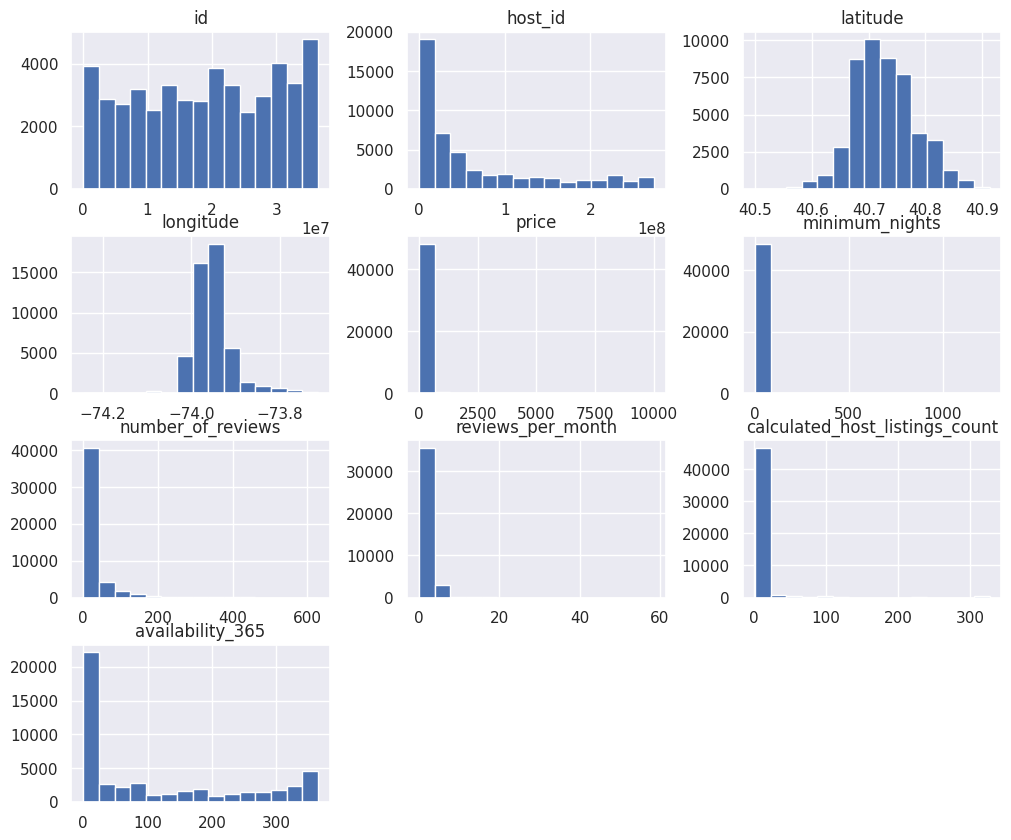

In [ ]:
# plotar histograma das variáveis numéricas
df.hist(bins=15, figsize=(12,10));



*   Para a latitude e longitude, é importante dizer que eles parecem bem concentrados, podendo observar mais eles futuramente.



##**Há Outliers presentes?**

É possível notar algumas discrepâncias através da análise dos histogramas. As variáveis price, minimum_nights os chamados outliers, valores que não seguem uma distribuição comum.

Para identificar com clareza se tais dados se tratam de outliers, há duas maneiras que nos auxiliam:

*   Resumo estatístico através do método describe().
*   Plotar boxplots para cada variavel.

In [ ]:
# descrever as informações de todo o dataset
df[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  48895.000000    48895.000000       48895.000000       38843.000000   
mean     152.720687        7.029962          23.274466           1.373221   
std      240.154170       20.510550          44.550582           1.680442   
min        0.000000        1.000000           0.000000           0.010000   
25%       69.000000        1.000000           1.000000           0.190000   
50%      106.000000        3.000000           5.000000           0.720000   
75%      175.000000        5.000000          24.000000           2.020000   
max    10000.000000     1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

Nota-se que em price 75% dos valores encontram-se abaixo de 175 dólares, enquanto o valor máximo é de 10.000 dólares. Já na coluna minimum_nights, 50% dos valores já se encontram muito abaixo dos 30 dias, enquanto o máximo registrado são 1250 dias, o que nos mostra que de fato há algo de errado.

Agora vamos analisar atráves de uma boxplot.

##**Boxplot para minimum_nights**

Como a cidade analisada é também conhecida pelo seu alto custo de vida, vou filtrar nossa busca por noites minimas para 30 dias, valor equivalente a 6 vezes acima da quantidade das noites médias.

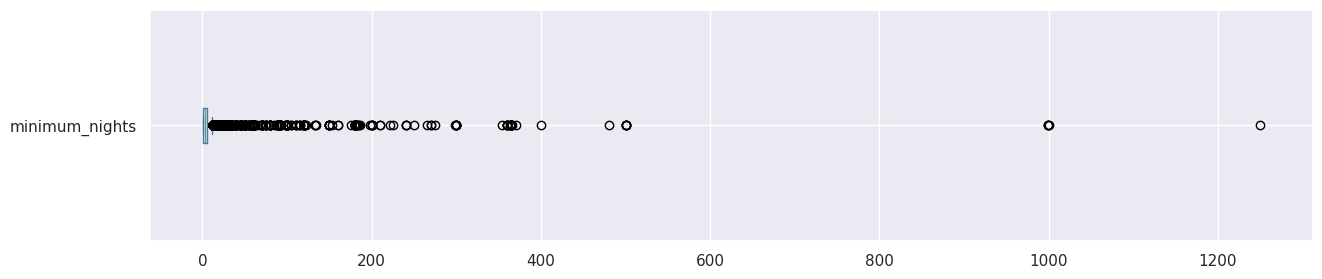

minimum_nights: Valores acima de 30 dias
747 entradas
1.5278%


In [ ]:
# plotando box plot
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#retornando quantidade de valores acima de 30 dias
print('minimum_nights: Valores acima de 30 dias')
print('{} entradas'.format(len(df[df.minimum_nights > 30])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Como podemos observar, 747 entradas, mais de 1,5% dos dados referente à minimum_nights estão fora do padrão, classificando-se como Outliers

##**Boxplot para price**

De acordo com o resumo estatístico obtido pelo método describe(), 75% dos valores do nosso DataSet encontram-se abaixo de 175,00 dólares enquanto o valor máximo encontra-se na casa dos 10.000,00 dólares.

Como a cidade analisada é também conhecida pelo seu alto custo de vida, vou filtrar nossa busca por price na casa dos 800,00 dólares, valor equivalente a 5 vezes acima dos 75% imóveis cadastrados.

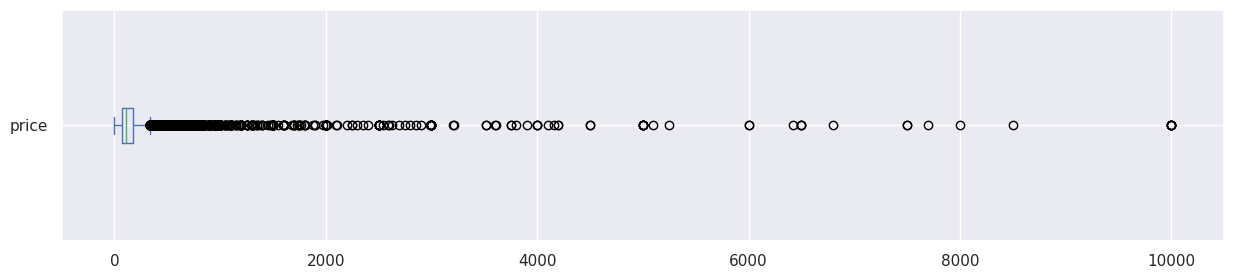

price: Valores acima de 800,00:
420 entradas
0.8590%


In [ ]:
#plotando boxplot
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# retornando a quantidade de valores acima de 800,00 dólares

print('price: Valores acima de 800,00:')
print('{} entradas'.format(len(df[df.price > 800])))
print('{:.4f}%'.format((len(df[df.price > 800]) / df.shape[0])*100))



Como podemos observar, 420 entradas, pouco menos de 1% dos dados referente ao price estão fora do padrão, também classificando como Outliers.



Vamos agora tratar nossos dados e limpar os outliers presentes.

# **Limpeza e Tratamento dos Dados**

##**Removendo Outliers**
Após ter encontrado outliers nas colunas price e minimum_nights, vamos agora limpar nosso Dataset para então plotar novamente um histograma e conferirmos quais as mudanças.

### ANÁLISE ESTATÍSTICA VS. NEGÓCIO
Inicialmente, o meio correto de remover Outliers seria utilizar o método IQR porém, como analista, percebi que isso eliminaria o setor de luxo de Nova York. Então optei por ajustar o limite para $800 de Preço, garantindo uma análise mais fiel à realidade do mercado e cobre 99% da base focando no público alvo padrão.

O mesmo se adequa a quantidade de noites, ajustando o limite para no máximo 30 dias, mesmo sendo bem distante da média geral.


Nova York tem uma variedade de preços (muitos imóveis de luxo). O método IQR (1.5 * intervalo) assume uma distribuição mais "normal". Quando ele corta, ele está tratando apartamentos de luxo legítimos e estadias de noites um pouco maiores que a média como se fossem erros, e isso destrói a análise de negócio.


Como solução se mantem o cálculo do IQR no código para aprendizado e visualização, mas vamos adicionar a análise de neg, definirei o corte em $800 para preservar esses dados válidos."






Análise Estatística com IQR não adotada:
Sugestão estatística (IQR) para corte de preço: $334.00
Sugestão estatística (IQR) para mínimo de noites: 11 dias

Decisão de Negócio adotada para análise:
Corte de Preço definido em: $800
Corte de Noites definido em: 30 dias

Dados limpos! Entradas restantes: 47756


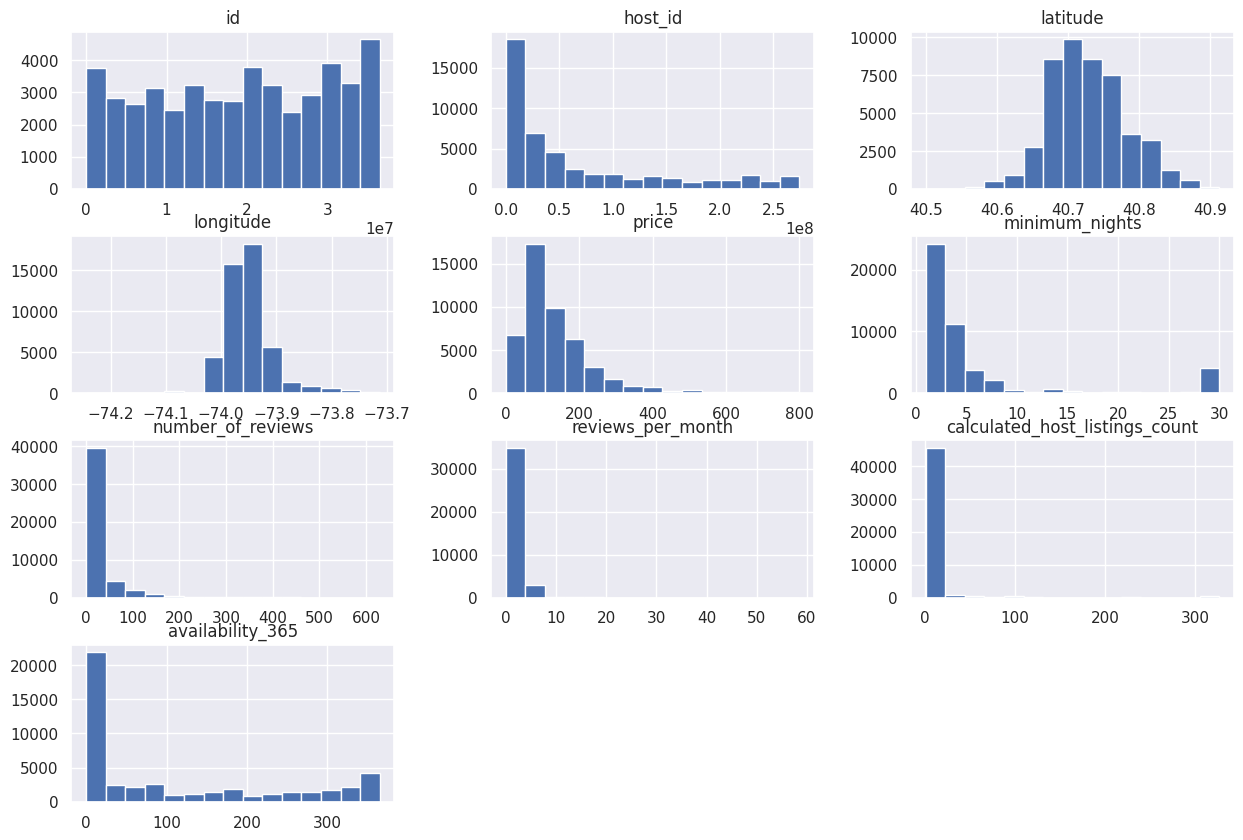

In [ ]:
df_clean = df.copy()

# 2. TRATAMENTO DE OUTLIERS (ANÁLISE ESTATÍSTICA VS. NEGÓCIO)

# Passo A: Análise Estatística com IQR

# Calculando o intervalo interquartil para entender a distribuição padrão
q1_price = df_clean.price.quantile(0.25)
q3_price = df_clean.price.quantile(0.75)
iqr_price = q3_price - q1_price
stat_limit_price = q3_price + 1.5 * iqr_price

q1_nights = df_clean.minimum_nights.quantile(0.25)
q3_nights = df_clean.minimum_nights.quantile(0.75)
iqr_nights = q3_nights - q1_nights
stat_limit_nights = q3_nights + 1.5 * iqr_nights
print(f'\nAnálise Estatística com IQR não adotada:')
print(f"Sugestão estatística (IQR) para corte de preço: ${stat_limit_price:.2f}")
print(f"Sugestão estatística (IQR) para mínimo de noites: {stat_limit_nights:.0f} dias")

# Passo B: Decisão de Negócio (Business Knowledge)

# A estatística sugere cortar preços acima de 334$ e estadias acima de 11 dias.
# PORÉM, Nova York possui um mercado de luxo forte e aluguéis mensais (30 dias) comuns.
# Seguir o IQR rigorosamente removeria dados válidos e importantes para a análise.

# Definição manual de limites baseada na visualização e conhecimento de domínio:
limit_price = 800       # Preserva imóveis de alto padrão, cortando apenas valores exorbitantes
limit_nights = 30       # Preserva aluguéis mensais, cortando apenas longa duração

print(f"\nDecisão de Negócio adotada para análise:")
print(f"Corte de Preço definido em: ${limit_price}")
print(f"Corte de Noites definido em: {limit_nights} dias")

# Passo C: Aplicando o Filtro
df_clean.drop(df_clean[df_clean.price > limit_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > limit_nights].index, axis=0, inplace=True)

print(f"\nDados limpos! Entradas restantes: {df_clean.shape[0]}")
df_clean.hist(bins=15, figsize=(15,10));

In [ ]:
# colocando em ordem decrescente as variáveis através dos valores ausentes
# apresentando em porcentagem
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False)

last_review                       0.200226
reviews_per_month                 0.200226
host_name                         0.000440
name                              0.000314
neighbourhood_group               0.000000
neighbourhood                     0.000000
id                                0.000000
host_id                           0.000000
longitude                         0.000000
latitude                          0.000000
room_type                         0.000000
price                             0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

Para preencher este vazio que se encontra em nosso Dataset, vamos completar os dados ausentes de name, host_name e last_review com 'Desconhecido'.

## Preenchendo Dados ausentes

In [ ]:
df_clean['name'] = df_clean['name'].fillna('unknown')
df_clean['host_name'] = df_clean['host_name'].fillna('unknown')
df_clean['last_review'] = df_clean['last_review'].fillna(0)

# conferindo se há dados ausentes
print(df_clean['name'].isnull().value_counts())
print(df_clean['host_name'].isnull().value_counts())
print(df_clean['last_review'].isnull().value_counts())

name
False    47756
Name: count, dtype: int64
host_name
False    47756
Name: count, dtype: int64
last_review
False    47756
Name: count, dtype: int64


Agora que o método isnull() não retornou True em nenhuma das tres variáveis que apresentavam o maior número de dados ausentes, vamos prosseguir.

Para preencher este outro vazio que se encontra em nosso Dataset, vamos completar os dados ausentes com os valores médios das colunas reviews_per_month e last_review.

In [ ]:
# Substituindo dados ausentes por 0.
# Motivo: Se 'reviews_per_month' é nulo, logicamente o imóvel nunca recebeu avaliações.
# Preencher com a média daria a falsa impressão de que um imóvel novo já foi avaliado.
df_clean['reviews_per_month'] = df_clean['reviews_per_month'].fillna(0)
df_clean['number_of_reviews'] = df_clean['number_of_reviews'].fillna(0)

# conferindo se há dados ausentes
print(df_clean['reviews_per_month'].isnull().value_counts())
print(df_clean['number_of_reviews'].isnull().value_counts())


reviews_per_month
False    47756
Name: count, dtype: int64
number_of_reviews
False    47756
Name: count, dtype: int64


Agora que o método isnull() não retornou True em nenhuma das duas variáveis que apresentavam o maior número de dados ausentes, vamos prosseguir.

In [ ]:

# --- Verificação Final ---
print("\n--- Verificação Final Pós-Limpeza ---\n")
df_clean.info()
print("\nValores ausentes restantes:\n", df_clean.isna().sum())
print(f"\nLinhas duplicadas restantes: {df_clean.duplicated().sum()}")


--- Verificação Final Pós-Limpeza ---

<class 'pandas.core.frame.DataFrame'>
Index: 47756 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              47756 non-null  int64  
 1   name                            47756 non-null  object 
 2   host_id                         47756 non-null  int64  
 3   host_name                       47756 non-null  object 
 4   neighbourhood_group             47756 non-null  object 
 5   neighbourhood                   47756 non-null  object 
 6   latitude                        47756 non-null  float64
 7   longitude                       47756 non-null  float64
 8   room_type                       47756 non-null  object 
 9   price                           47756 non-null  int64  
 10  minimum_nights                  47756 non-null  int64  
 11  number_of_reviews               47756 non-null  int64  
 1

# **Engenharia de Atributos**

##Quais os nomes das regiões que existem na cidade de Nova York?


In [ ]:
#Separando a coluna neighbourhood_group do df
regioes = df_clean.loc[:,'neighbourhood_group']

#Separando as regiões unicas
regioes_unicas = np.unique(regioes)
print(f'As regioes unicas da cidade de Nova York são:{regioes_unicas}')

As regioes unicas da cidade de Nova York são:['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']


As regioes unicas da cidade de Nova York são:
- Bronx
- Brooklyn
- Manhattan
- Queens
- Staten Island


##Qual a média do preço do aluguel na cidade de Nova York?


In [ ]:
#Separando a coluna price do df
preco = df_clean.loc[:,'price']
preco2 = df.loc[:,'price']
#Calculando a media e mostrando o resultado
preco_medio = np.mean(preco)
preco_medio_out = np.mean(preco2)
print(f'COM OUTLIERS: \n\n  A média do aluguel na cidade é {preco_medio_out:.2f}\n\n')
print(f'SEM OUTLIERS: \n\n  A média do aluguel na cidade é {preco_medio:.2f}\n\n')

COM OUTLIERS: 

  A média do aluguel na cidade é 152.72


SEM OUTLIERS: 

  A média do aluguel na cidade é 138.28




A média do aluguel é 138.28

##Quantos anfitriões(Hosts) únicos estão cadastra dos na base de dados?


In [ ]:
anfitrioes = df_clean.loc[:,'host_id']
anfitrioes_unicos = len(np.unique(anfitrioes))

print(f'Existem {anfitrioes_unicos} antitriões unicos na base de dados')

Existem 36662 antitriões unicos na base de dados


Existem 36662 antitriões unicos na base de dados


##Qual o numero médio de avaliações?


In [ ]:
numero_avaliacao = df_clean.loc[:,'number_of_reviews']
media_avalicao = np.mean(numero_avaliacao[numero_avaliacao>0])
print(f'O numero médio de avaliações é {round(media_avalicao,2)}')


O numero médio de avaliações é 29.49


O numero médio de avaliações é 29.49


##Quantos imóveis estão disponíveis em cada região?

In [ ]:
#Filtrar as informações por região e disponibilidade

manhattan2 = len(df_clean[(df_clean['neighbourhood_group'] == 'Manhattan') & (df_clean['availability_365'] > 0)])
bronx = len(df_clean[(df_clean['neighbourhood_group'] == 'Bronx') & (df_clean['availability_365'] > 0)])
brooklyn = len(df_clean[(df_clean['neighbourhood_group'] == 'Brooklyn') & (df_clean['availability_365'] > 0)])
queens = len(df_clean[(df_clean['neighbourhood_group'] == 'Queens') & (df_clean['availability_365'] > 0)])
staten_Island = len(df_clean[(df_clean['neighbourhood_group'] == 'Staten Island') & (df_clean['availability_365'] > 0)])





#Mostrar a resposta ao usuário
print(f'''
Manhattan - {manhattan2}
Bronx - {bronx}
Brooklyn - {brooklyn}
Queens - {queens}
Staten Island - {staten_Island} ''')


Manhattan - 12983
Bronx - 900
Brooklyn - 12014
Queens - 4242
Staten Island - 325 


- Manhattan - 12983
- Bronx - 900
- Brooklyn - 12014
- Queens - 4242
- Staten Island - 325

##Qual a correlação existente entre as variáveis?

Correlação é nada mais nada menos do que a relação entre pares de dados.

Há meios de se medir essa correlação, e é função do coeficiente de correlacão estabelecer qual a intensidade. Para identificar estas correlações vamos:

1.   Criar uma Matriz de correlação,
2.   Gerar um HeatMap desta matriz



In [ ]:
# criando uma Matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'reviews_per_month', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'latitude', 'longitude']].corr()

display(corr)

price  minimum_nights  reviews_per_month  \
price                           1.000000        0.052600          -0.055240   
minimum_nights                  0.052600        1.000000          -0.222213   
reviews_per_month              -0.055240       -0.222213           1.000000   
number_of_reviews              -0.056990       -0.148993           0.588189   
calculated_host_listings_count  0.145909        0.332270          -0.047762   
availability_365                0.112091        0.242069           0.172402   
latitude                        0.065469        0.042972          -0.017970   
longitude                      -0.272400       -0.103071           0.136998   

                                number_of_reviews  \
price                                   -0.056990   
minimum_nights                          -0.148993   
reviews_per_month                        0.588189   
number_of_reviews                        1.000000   
calculated_host_listings_count          -0.072897   
availability_365                         0.179403   
latitude                                -0.014838   
longitude                                0.057105   

                                calculated_host_listings_count  \
price                                                 0.145909   
minimum_nights                                        0.332270   
reviews_per_month                                    -0.047762   
number_of_reviews                                    -0.072897   
calculated_host_listings_count                        1.000000   
availability_365                                      0.229451   
latitude                                              0.019453   
longitude                                            -0.115968   

                                availability_365  latitude  longitude  
price                                   0.112091  0.065469  -0.272400  
minimum_nights                          0.242069  0.042972  -0.103071  
reviews_per_month                       0.172402 -0.017970   0.136998  
number_of_reviews                       0.179403 -0.014838   0.057105  
calculated_host_listings_count          0.229451  0.019453  -0.115968  
availability_365                        1.000000 -0.014319   0.089302  
latitude                               -0.014319  1.000000   0.084753  
longitude                               0.089302  0.084753   1.000000

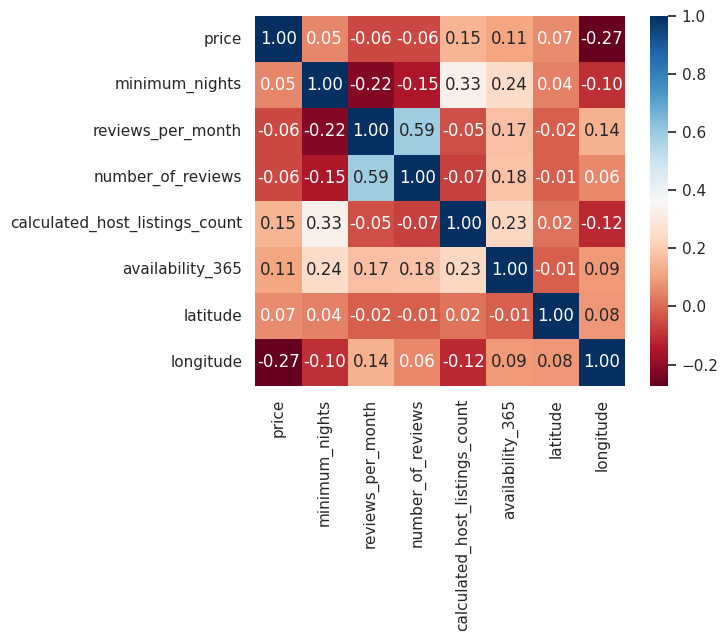

In [ ]:
# plotando Heatmap através das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='White', annot=True);

Usando a variação de cores, podemos representar a correlação entre as variáveis ​​em ambos os eixos, cores mais escuras indicam uma correlação negativa entre as duas variáveis.


A partir da matriz de correlação, é visível que 'number_of_reviews' e 'reviews_per_month' estão positivamente correlacionados, pois pode-se esperar uma taxa maior de avaliações por mês se houver um número maior de avaliações.


Há uma correlação negativa entre 'price' e 'longitude', uma vez que os preços mais altos geralmente são encontrados em locais mais movimentados.


Além disso, podemos observar uma correlação negativa entre 'preço' e 'número_de_avaliações', o que leva à conclusão de que propriedades com preços mais baixos têm maior probabilidade de serem reservadas e de terem mais avaliações.

A partir do Mapa de Calor das relações podemos usar-lo mais tarde para uma tentativa de Regressão Linear.

##Qual a quantidade total de imóveis disponíveis e o seu tipo mais alugado?


A variável `room_type` indica o tipo de quarto que está sendo oferecido, podendo ser:


  - Apartamento completo
  - Quarto único
  - Quarto compartilhado

  Vamos contar a quantidade de ocorrências de cada tipo de aluguel, utilizando o método `value_counts()`


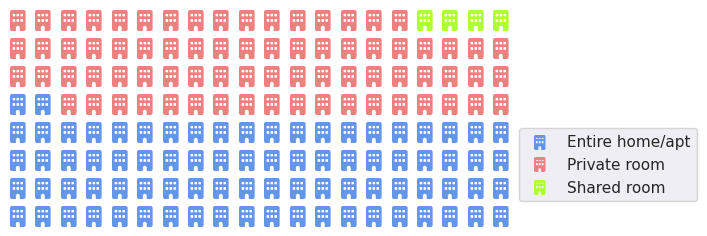

room_type
Entire home/apt    24582
Private room       22035
Shared room         1139
Name: count, dtype: int64


In [ ]:
# mostrar a quantidade de cada tipo de imóvel
data = dict(df_clean['room_type'].value_counts())
fig = plt.figure(
    FigureClass=Waffle,
    rows=8,
    columns=20,
    colors=("#6495ED", "#F08080", "#ADFF2F"), # Adjusted to 3 colors
    values = data,
    icons= 'building',
    icon_size = 15,
    icon_legend=True,
    block_arranging_style='new-line',
    vertical=True,
    interval_ratio_x = 1,
    interval_ratio_y = 1.2,
    legend={
        'labels': ['Entire home/apt', 'Private room', 'Shared room'], # Adjusted to 3 labels
        'loc': 'upper left',
        'bbox_to_anchor': (1.01, .49)

    }
)
fig.set_tight_layout(False)
plt.show();
print(df_clean.room_type.value_counts())

In [ ]:
# mostrando a porcentagem de cada tipo de imóvel disponível
print('A seguir, o percentual de cada tipo de imóvel disponível:')
print(df_clean.room_type.value_counts()/ df_clean.shape[0]*100)

A seguir, o percentual de cada tipo de imóvel disponível:
room_type
Entire home/apt    51.474160
Private room       46.140799
Shared room         2.385041
Name: count, dtype: float64


A privacidade é aquilo que se busca.

Como pode ser visto no gráfico acima, os preços tendem a cair de acordo com a privacidade adquirida. 51% dos imóveis são apartamentos completos, e em segundo lugar com 46% de disponibilidade encontram-se os quartos privados.

##Qual a localidade mais cara do Dataset?

Na hora de se programar para uma viagem, os custos com acomodação englobam boa parte dos gastos, ainda mais quando se trata de Nova Iorque, considerado o terceiro metro quadrado mais caro do mundo de acordo com a Forbes.
Primeiro vamos conferir quais os distritos `(neighbourhood_group)` mais caros, para então aprofundarmos nossa análise.

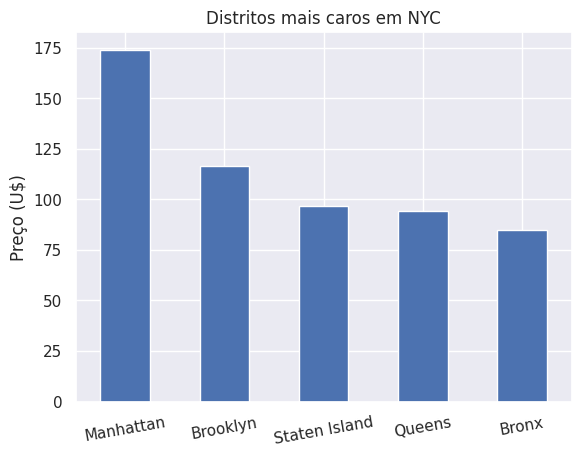

neighbourhood_group
Manhattan        174.120613
Brooklyn         116.453851
Staten Island     96.489071
Queens            94.291533
Bronx             84.632900
Name: price, dtype: float64


In [ ]:
# plotando gráfico com os distritos mais caros
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Distritos mais caros em NYC')
plt.xlabel('')
plt.ylabel('Preço (U$)')
plt.xticks(rotation=10)
plt.show()


print(df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:10])


Agora que conhecemos o valor médio de cada um dos distritos da cidade de Nova Iorque, vamos analisar os bairros.

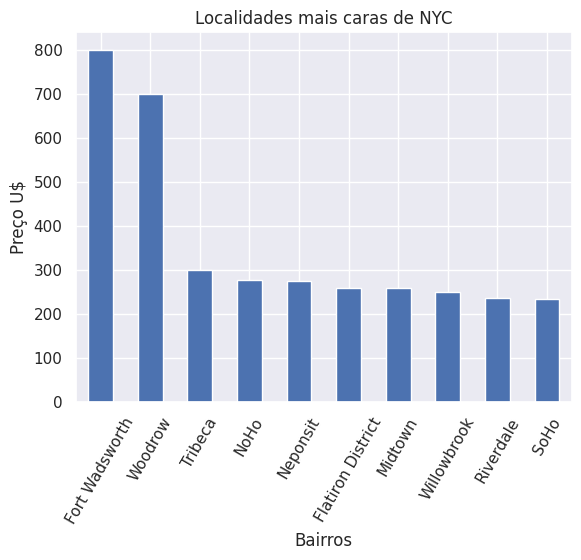

neighbourhood
Fort Wadsworth       800.000000
Woodrow              700.000000
Tribeca              298.858974
NoHo                 276.246753
Neponsit             274.666667
Flatiron District    258.753425
Midtown              257.983188
Willowbrook          249.000000
Riverdale            236.300000
SoHo                 233.434132
Name: price, dtype: float64


In [ ]:
# plotando gráfico com localidades mais caras
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Localidades mais caras de NYC')
plt.xlabel('Bairros')
plt.ylabel('Preço U$')
plt.xticks(rotation=60)
plt.show()

print(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10])

Problemas com a Média

Ao analisar as localidades que apresentam o valor médio mais elevado, apenas *Tribeca*, *NoHo* e *SoHo* são bairros de Manhattan, local que apresenta os maiores valores médios registrados, e ainda encontram-se no final da lista dos bairros mais caros.

Como podemos observar abaixo, Fort Wadsworth apresenta apenas um imóvel registrado, fazendo com que o seu valor médio não represente a realidade.

In [ ]:
# ver as entradas de Fort Wadsworth
df_clean[df_clean.neighbourhood == 'Fort Wadsworth'].head()

id                                             name  host_id  \
25386  20305160  Beach House Retreat. 15 minutes from Manhattan.  1715301   

      host_name neighbourhood_group   neighbourhood  latitude  longitude  \
25386      Mark       Staten Island  Fort Wadsworth  40.59546  -74.06092   

             room_type  price  minimum_nights  number_of_reviews last_review  \
25386  Entire home/apt    800               7                  0           0   

       reviews_per_month  calculated_host_listings_count  availability_365  
25386                0.0                               3               365

Portanto, vamos conferir a quantidade de entradas nas localidades listadas como as mais caras, para identificar a real situação dos valores médios apresentados.

In [ ]:
# Ver a quantidade de imóveis registrados nas 10 localidades consideradas mais caras
print('Quantidade de Imóveis por localidade')
print('')
print('Fort Wadsworth = ', df_clean[df_clean.neighbourhood == 'Fort Wadsworth'].shape[0])
print("Prince's Bay = ", df_clean[df_clean.neighbourhood == "Prince's Bay"].shape[0])
print('Neponsit = ', df_clean[df_clean.neighbourhood == 'Neponsit = '].shape[0])
print('Willowbrook = ', df_clean[df_clean.neighbourhood == 'Willowbrook'].shape[0])
print('Tottenville = ', df_clean[df_clean.neighbourhood == 'Tottenville'].shape[0])
print('Belle Harbor = ', df_clean[df_clean.neighbourhood == 'Belle Harbor'].shape[0])
print('Tribeca = ', df_clean[df_clean.neighbourhood == 'Tribeca'].shape[0])
print('Woodrow = ', df_clean[df_clean.neighbourhood == 'Woodrow'].shape[0])
print('NoHo = ', df_clean[df_clean.neighbourhood == 'NoHo'].shape[0])
print('SoHo = ', df_clean[df_clean.neighbourhood == 'SoHo'].shape[0])

Quantidade de Imóveis por localidade

Fort Wadsworth =  1
Prince's Bay =  3
Neponsit =  0
Willowbrook =  1
Tottenville =  7
Belle Harbor =  8
Tribeca =  156
Woodrow =  1
NoHo =  77
SoHo =  334


Como podemos observar, as localidades mais caras apresentadas apresentam quantidades relativamente baixas de imóveis registrados, exceto por Tribeca e SoHo e até NoHo que possuem uma quantidade mais elevada de entradas.

Sendo assim, vamos analisar as localidades mais caras apena do distrito de Manhattan.

In [ ]:
#criando variável para cada distrito
manhattan= df_clean.loc[df_clean["neighbourhood_group"] == "Manhattan"]
brooklyn = df_clean.loc[df_clean["neighbourhood_group"] == 'Brooklyn']
staten_island = df_clean.loc[df_clean['neighbourhood_group'] == 'Staten Island']
queens = df_clean.loc[df_clean['neighbourhood_group'] == 'Queens']
bronx = df_clean.loc[df_clean['neighbourhood_group'] == 'Bronx']

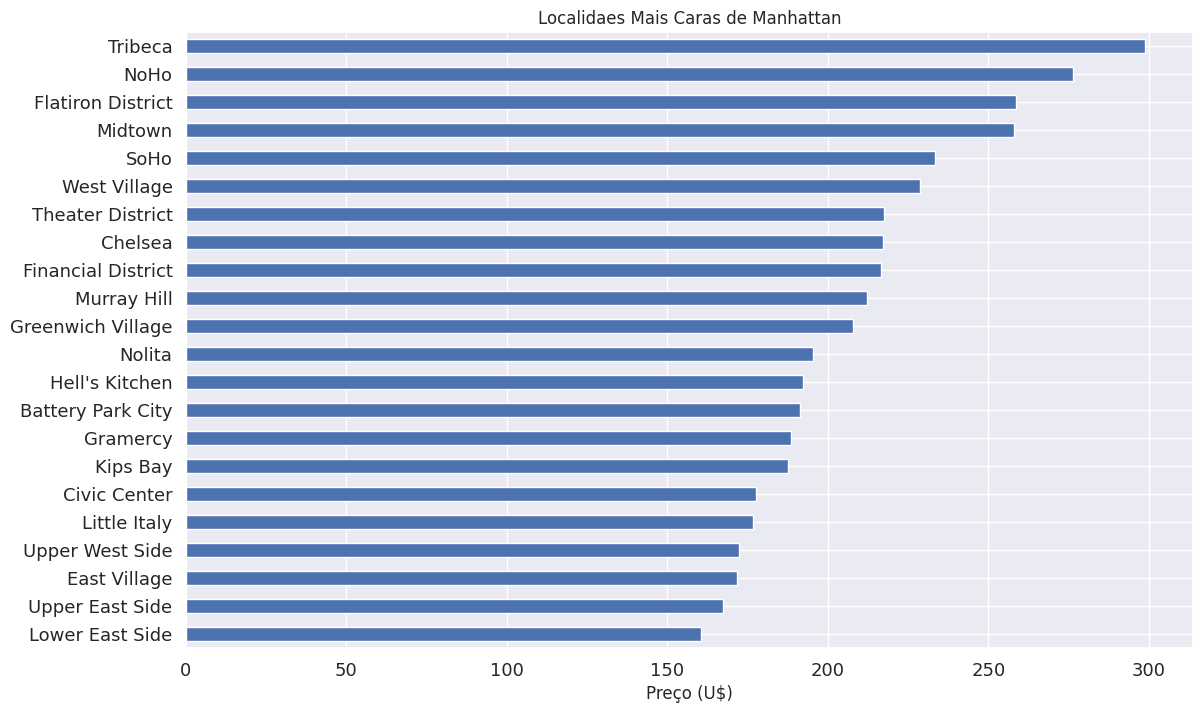

neighbourhood
Lower East Side       160.365062
Upper East Side       167.434555
East Village          171.628382
Upper West Side       172.308342
Little Italy          176.550459
Civic Center          177.620000
Kips Bay              187.751634
Gramercy              188.558642
Battery Park City     191.400000
Hell's Kitchen        192.347644
Nolita                195.243902
Greenwich Village     207.977654
Murray Hill           212.052521
Financial District    216.486933
Chelsea               217.283822
Theater District      217.594203
West Village          228.653793
SoHo                  233.434132
Midtown               257.983188
Flatiron District     258.753425
NoHo                  276.246753
Tribeca               298.858974
Name: price, dtype: float64


In [ ]:
# Plotando gráfico das localidades mais caras de Manhattan
manhattan.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[10:].plot(kind='barh', figsize=(13,8), fontsize=13)
plt.title('Localidaes Mais Caras de Manhattan')
plt.ylabel('')
plt.xlabel('Preço (U$)')
plt.show()

print(manhattan.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[10:])


Como podemos observar, as 5 localidades mais caras apresentam valores médios acima de 200,00 dólares a diária.

Agora vamos seguir no caminho inverso, e procurar pelas localidades mais baratas, porém também dentro de Manhattan, uma vez que lá se encontra a maior parte dos pontos turísticos da cidade de Nova Iorque.


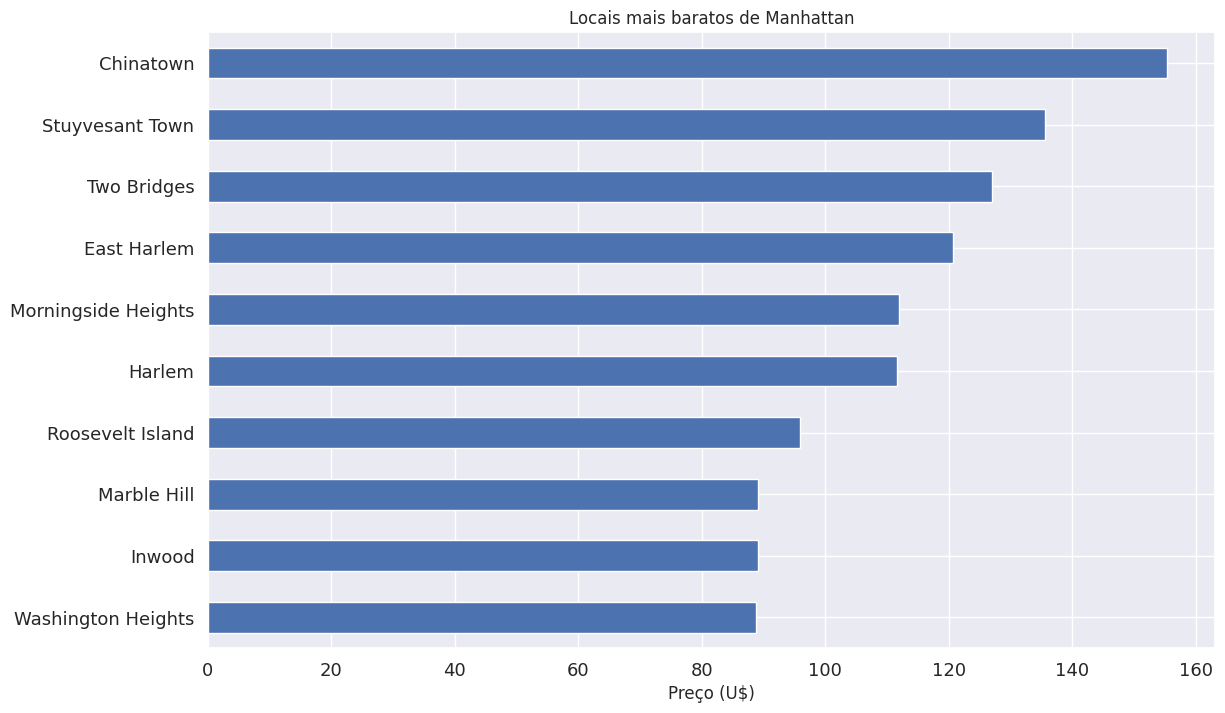

neighbourhood
Washington Heights      88.837315
Inwood                  89.059761
Marble Hill             89.166667
Roosevelt Island        95.946667
Harlem                 111.642830
Morningside Heights    111.973451
East Harlem            120.762035
Two Bridges            127.028169
Stuyvesant Town        135.625000
Chinatown              155.404432
Lower East Side        160.365062
Upper East Side        167.434555
East Village           171.628382
Upper West Side        172.308342
Little Italy           176.550459
Name: price, dtype: float64


In [ ]:
# plotando gráfico das localidades mais baratas de Manhattan
manhattan.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[:10].plot(kind='barh', figsize=(13,8), fontsize=13)
plt.title("Locais mais baratos de Manhattan")
plt.xlabel('Preço (U$)')
plt.ylabel("")
plt.show()


print(manhattan.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[:15])


Como podemos observar, as 5 localidades mais baratas de Manhattan apresentam valores médios de 94 dólares a diária.

É possível se hospedar em Manhattan sem comprometer a maior parte do orçamento da viagem apenas na hospedagem. Nova Iorque tem uma linha de metrô bem extensa, permitindo ir de ponta a ponta na ilha de Manhattan em poucos minutos. Sair da Times Square e chegar até o Brooklyn fazendo poucas conexões.

# **Exploração visual dos Dados**


## Distribuição dos Imóveis através das Coordenadas Geográficas


Ao plotar um gráfico com as informações de Latitude e Longitude, podemos gerar um mapa do local, diferenciando a variação de preço de cada imóvel registrado.

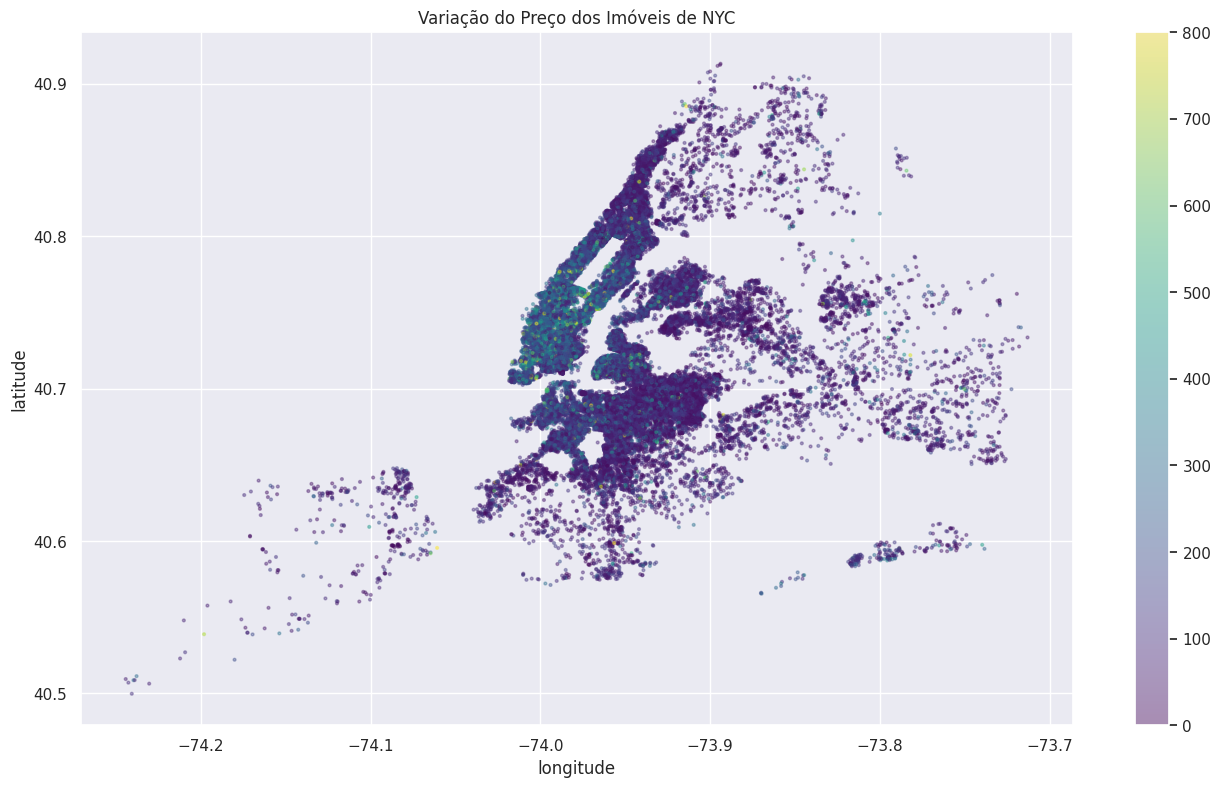

In [ ]:
# plotando gráfico com Latitude e Longitude
df_clean.plot(
    kind='scatter',
    title='Variação do Preço dos Imóveis de NYC',
    x ='longitude',
    y = 'latitude',
    alpha=0.4,
    c =df_clean['price'],
    s=4,
    cmap=plt.get_cmap('viridis'),
    figsize=(16,9)
);

A cidade de Nova Iorque possui uma área de 783 quilômetros quadrados, portanto o mapa não se torna tão nítido nesta visualização.

Sendo assim vamos plotar novamente, mas somente a área de Manhattan que possui apenas 59 quilômetros quadrados e a que tem mais imóveis.

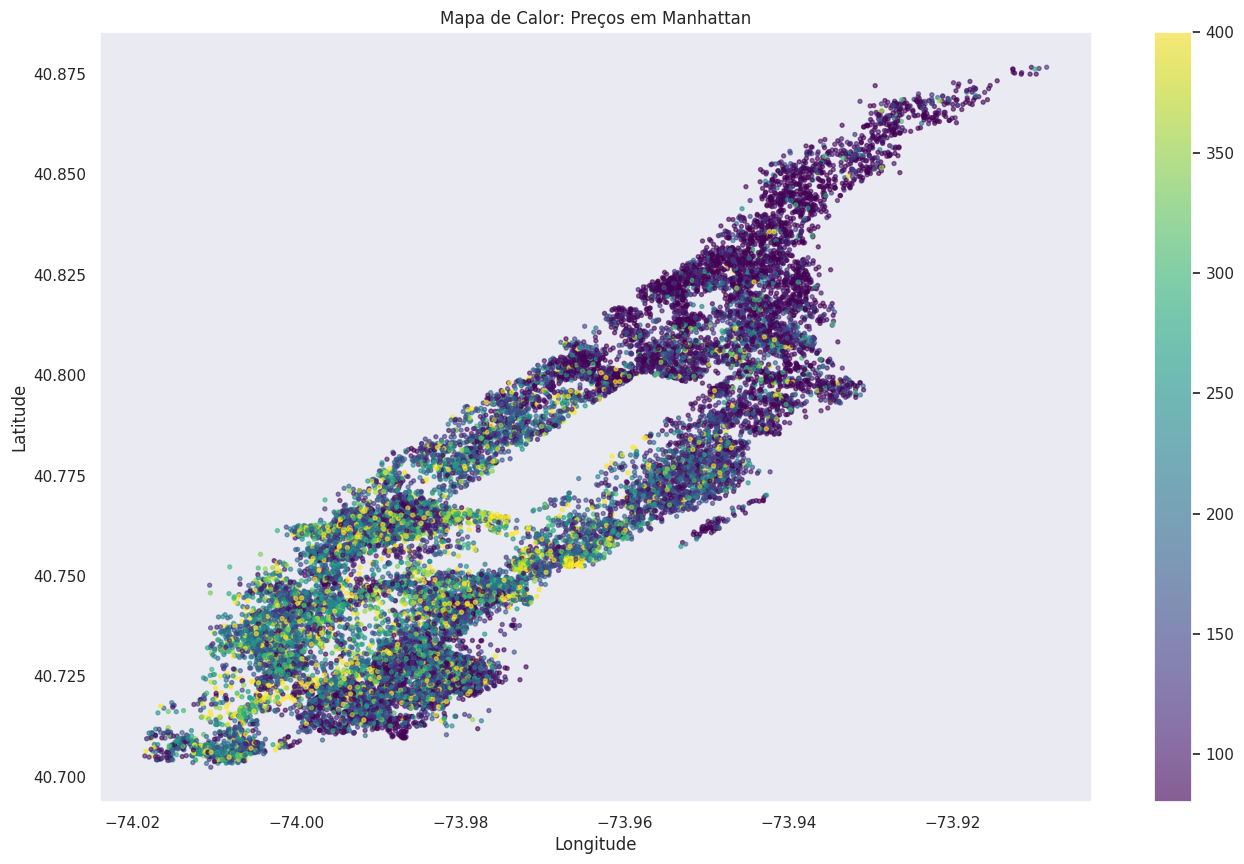

In [ ]:
# plotando gráfico de latitude e longitude de Manhattan
# cmap='viridis' para melhor percepção visual e inclusão de colorbar (cbar)
ax = manhattan.plot(
    kind='scatter',
    title='Mapa de Calor: Preços em Manhattan',
    x ='longitude',
    y = 'latitude',
    vmin=80,# valor mínimo da escala de cores
    vmax=400,# valor máximo da escala de cores
    grid=False,
    legend=False,
    alpha=0.6,
    c =manhattan['price'],
    s=8,
    cmap=plt.get_cmap('viridis'),
    figsize=(16,10),
    colorbar=True,
    sharex=False
);
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

Se pode visualizar que em Manhattan a maioria dos preços fica na faixa dos 100 a 200 Dólares.

## Média de noites mínimas dos imóveis por região

In [ ]:
# ver a média da coluna minimum_nights de cada distrito
print('Manhattan: {:.1f} noites'.format(manhattan['minimum_nights'].mean()))
print('Brookly: {:.1f} noites'.format(brooklyn['minimum_nights'].mean()))
print('Staten Island: {:.1f} noites'.format(staten_island['minimum_nights'].mean()))
print('Queens: {:.1f} noites'.format(queens['minimum_nights'].mean()))
print('Bronx: {:.1f} noites'.format(bronx['minimum_nights'].mean()))

Manhattan: 6.7 noites
Brookly: 4.9 noites
Staten Island: 3.6 noites
Queens: 4.4 noites
Bronx: 3.2 noites


Ao analisar média de noites em todo o DataSet, observa-se que pessoas que buscam um lugar para ficar em Nova Iorque pelo Airbnb, pretendem ficar na cidade por um período mais curto, uma vez que custear um hotel por mais que duas semanas, se torna uma alternativa cara e inválida.

##Quantas noites as pessoas gostam de ficar em NY?


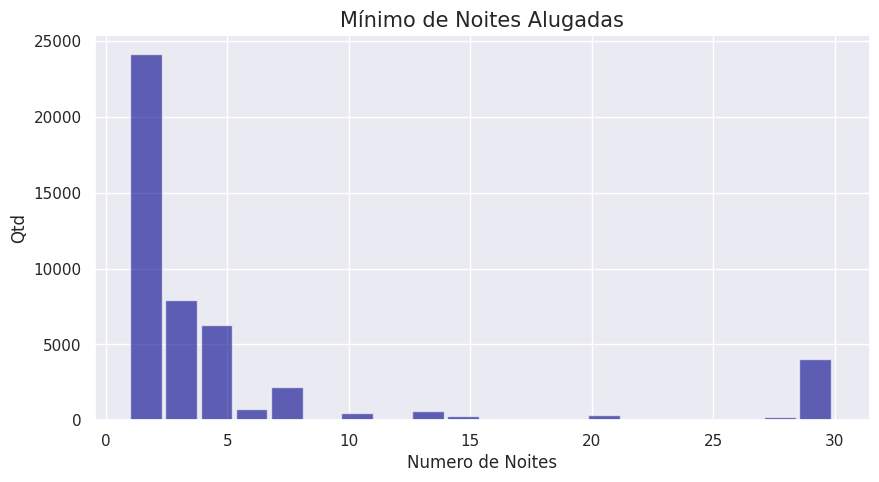

Média de noites: 5.6 noites


In [ ]:
# Countplot minimum_nights
df_clean.minimum_nights[df_clean.minimum_nights<=30].hist(bins = 20, alpha=0.6, width=1.3, figsize=(10,5), color='darkblue')
plt.title('Mínimo de Noites Alugadas', size=15)
plt.xlabel('Numero de Noites')
plt.ylabel('Qtd')
plt.show()

# ver a média da coluna minimum_nights
md = df_clean['minimum_nights'].mean()
print('Média de noites: {:.1f} noites'.format(md))

A media de noites alugadas é 5 dias. Contudo, os alugueis mais frequentes estão na faixa de 2 a 5 dias. É interessante notar aqui que o aluguel de 30 dias ocorre frequentemente também.

## Quanto as pessoas estão pagando?


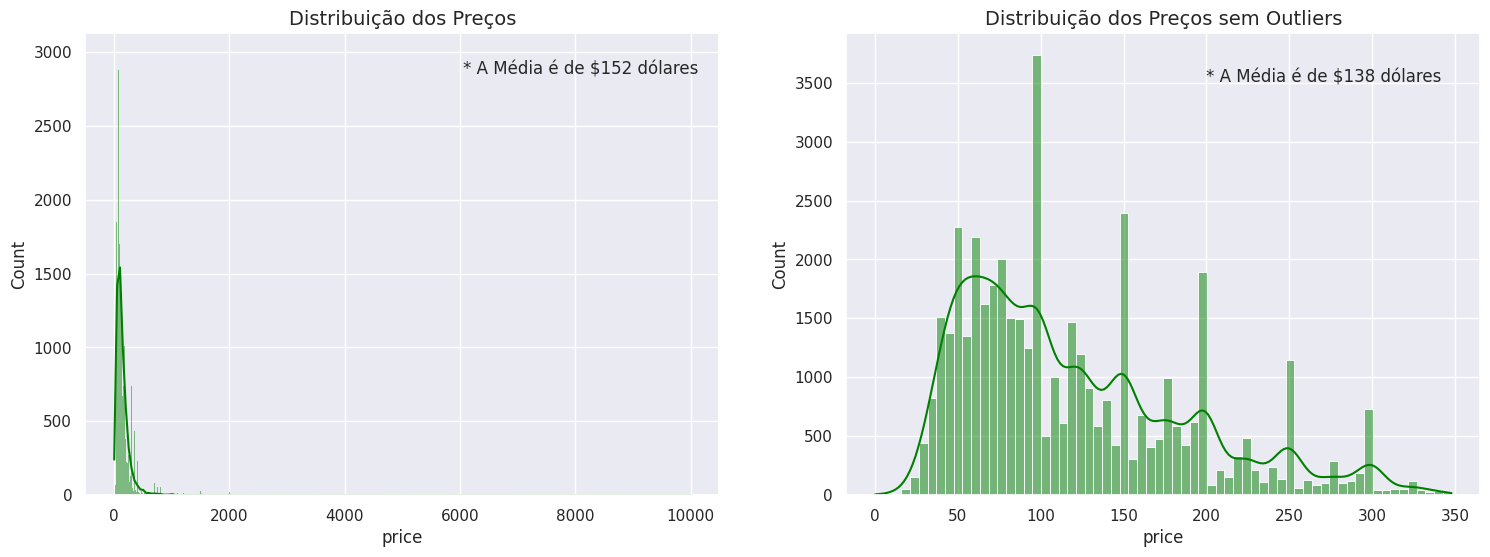

In [ ]:
# Price average
fig, axs = plt.subplots(ncols=2, figsize=(18,6))

# Plot sem filtro
sns.histplot(df['price'], kde=True, color='green', ax=axs[0])
axs[0].set_title('Distribuição dos Preços', size=14)
axs[0].text(6050, 2850, '* A Média é de $152 dólares', size=12)

# Plot com filtro (sem outliers)
q = df_clean.price.quantile(.95)
sns.histplot(df_clean.price[df_clean.price < q], kde=True, color='green', ax=axs[1])
axs[1].set_title('Distribuição dos Preços sem Outliers', size=14)
axs[1].text(200, 3500, '* A Média é de $138 dólares', size=12)

plt.show()




Pessoas estão ficando em NYC e pagando, uma média de 138 dólares por dia no Airbnb. No primeiro gráfico, sem retirar os outliers, a média é 152 dólares, mas então nós podemos estar contando com alguns casos onde a pessoa paga 10 mil dólares.

## Localização x Preço


In [ ]:
# Cria uma parte do Dataset com o top 50 alugueis
index = df_clean.groupby('host_id').id.count().sort_values(ascending=False).head(50).index
df_top50 = df_clean[df_clean.host_id.isin(index)].reset_index()

In [ ]:
#Cria uma função para adicionar uma marca ao mapa
def add_marker(lat, lon, text):
    return folium.CircleMarker(location=[lat, lon],
                               radius=3,
                               color='black',
                               popup=text).add_to(m)

# Criando a base do mapa,inicializando em Manhattan e adicionando os pontos.
m = folium.Map(location=[40.75, -73.97], zoom_start=13)
for i in range(len(df_top50)):
    add_marker(df_top50.latitude[i], df_top50.longitude[i],str(df_top50.price[i])+'USD')

# Adicionando ao mapa de calor
data_loc= df_top50[['latitude','longitude', 'price']].values
data_loc =data_loc.tolist()
hm = plugins.HeatMap(data_loc)
hm.add_to(m)

m

Agora com este mapa de calor com a localização dos preços mostrado, fica mais facil para visualizar as localizações onde as propriedades estão concentradas e que os maiores preços estão no Brooklyn e Manhatan, sendo eles mais atrativos para trabalho e turismo.

## Existe alguma relação entre o preço da acomodação e o número de avaliações, dependendo da região?


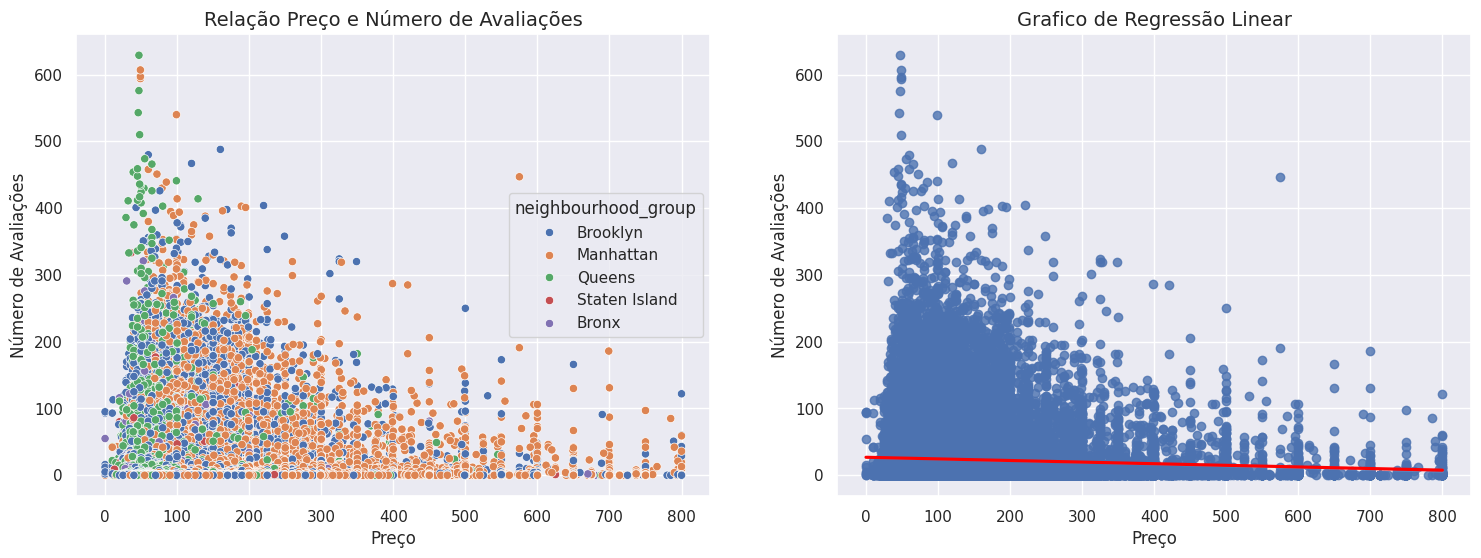

In [ ]:



# Price average
fig, axs = plt.subplots(1,2, figsize=(18,6))

# Grafico de Dispersão
sns.scatterplot(data=df_clean,x='price',y='number_of_reviews',hue='neighbourhood_group', ax=axs[0])
axs[0].set_title('Relação Preço e Número de Avaliações', size=14)
axs[0].set_xlabel('Preço')
axs[0].set_ylabel('Número de Avaliações')


# Grafico de Regressão Linear
sns.regplot(data=df_clean,x='price',y='number_of_reviews',line_kws={'color': 'red'}, ax=axs[1])
axs[1].set_title('Grafico de Regressão Linear', size=14)
axs[1].set_xlabel('Preço')
axs[1].set_ylabel('Número de Avaliações')
plt.show()



**Primeiro Grafico**

Se consegue concluir que nos 5 tipos de pontos, cada um representando uma região, mostram que maiores são os reviews, menores tendem a ser seus preços, sugerindo uma relação negativa entre as duas variáveis.

A partir do gráfico de dispersão, conseguimos avaliar a correlação linear, que indica a força e a direção da relação entre duas variáveis numéricas:
  - Positiva: uma variável aumenta e a outra também aumenta.
  - Negativa: uma variável aumenta e a outra diminui.
  - Nenhuma relação linear aparente: não é possível identificar uma tendência clara.

**Segundo Grafico**
**-Regressão Linear-**

Observa-se que a reta que foi calculada usando o metodo dos minimos quadrados está praticamente toda nos pontos do grafíco, não ficando muito fora.
Se soubermos a relação entre o Preço e o Numero de Avaliações, poderiamos prever qual seria o Preço do imóvel com 200 avaliações, mesmo sem esse dado existir na amostra.


 - A regressão linear é uma técnica estatística que, a partir do gráfico de dispersão, traça uma reta de melhor ajuste entre os pontos.

 - Essa reta é calculada de modo que a distância entre os pontos e a linha seja a menor possível (método dos mínimos quadrados).

 - O resultado é uma equação matemática que descreve a relação entre as variáveis e pode ser usada para prever valores desconhecidos de uma variável dependente (y) a partir de uma variável independente (x).


## Existe alguma relação entre o preço da acomodação e o número de avaliações, dependendo do tipo de quarto?


Text(0, 0.5, 'Número de Avaliações')

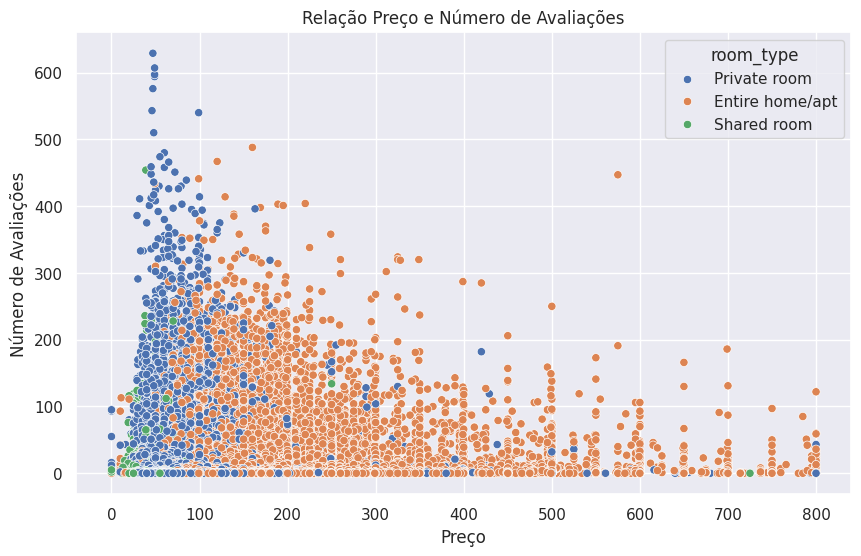

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(
    data=df_clean,
    x='price',
    y='number_of_reviews',
    hue='room_type'
)

ax.set_xlabel('Preço')
ax.set_title('Relação Preço e Número de Avaliações')
ax.set_ylabel('Número de Avaliações')


Se consegue concluir que nos 3 tipos de pontos, cada um representando um tipo de quarto, mostram que maiores são os reviews, menores tendem a ser seus preços, e se prevalece o Quarto Privado como escolha principal apartir dos preços ficarem mais baratos e com maiores numeros de reviews, sugerindo uma relação negativa entre as duas variáveis.


##Quais Host são os mais escolhidos?

In [ ]:
# Hosts mais escolhidos
busyHosts = pd.DataFrame(df_clean.groupby('host_id').id.count().sort_values(ascending=False).head(10).reset_index())
busyHosts.columns = ['host_id','rentals']


# Adicionando os nomes dos Hosts mais escolhidos no subconjunto do DataFrame busyHosts
names = []
for r in range(busyHosts.shape[0]):
    for i in range(len(df_clean)):
        if busyHosts.host_id[r] == df.host_id[i]:
            names.append(df_clean.host_name[i])
            break

In [ ]:
busyHosts['host_name'] = names
busyHosts

host_id  rentals          host_name
0  219517861      327       Sonder (NYC)
1  107434423      224         Blueground
2   30283594      117               Kara
3  137358866      103             Kazuya
4   12243051       96             Sonder
5   16098958       96     Jeremy & Laura
6   61391963       90  Corporate Housing
7   22541573       87                Ken
8  200380610       62            Pranjal
9    7503643       52               Vida

/tmp/ipython-input-3313050021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(y='rentals', x='host_name', data=busyHosts,legend=False, palette='spring')


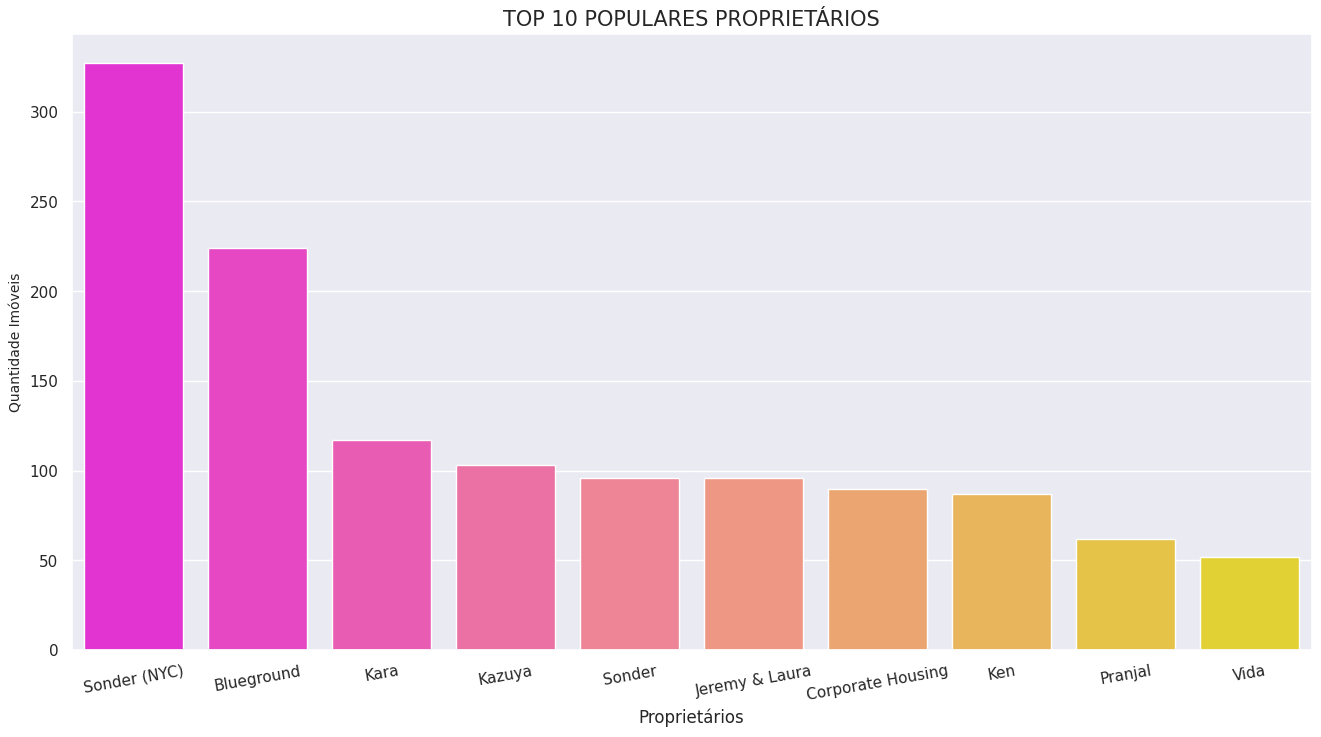

In [ ]:
# Bar plot dos Top 10 busyHosts
plt.figure(figsize=(16,8))
g = sns.barplot(y='rentals', x='host_name', data=busyHosts,legend=False, palette='spring')
plt.ylabel("Quantidade Imóveis",fontdict= {'size':10})
plt.xlabel("Proprietários", fontdict= {'size':12})
plt.title("TOP 10 POPULARES PROPRIETÁRIOS", size=15)
plt.xticks(rotation=10)
plt.show()

In [ ]:
print(f'Unicos host IDs: {len(df_clean.host_id.unique())}')
print(f'Top 10 proprietarios: {sum(busyHosts.rentals)}. \nPercentual Total do Dataset: {round(sum(busyHosts.rentals)/len(df_clean.id)*100,2)}%')

Unicos host IDs: 36662
Top 10 proprietarios: 1254. 
Percentual Total do Dataset: 2.63%


Pelo grafico e dos calculos acima, é possivel extrair que os Top 5 proprietários são responsáveis por 69% das Top 10 transações. O Top 10 representa 2,6% de todos os aluguéis. Sendo eles os mais escolhidos pois são os que contém mais imóveis comparado a outros do dataset.

## Onde eles tem suas Propriedades?

In [ ]:
# Extracting only the Top 10 hosts from original DF and put in a DF.
hosts = list(busyHosts.host_id)
df2 = df_clean[df_clean['host_id'].isin(hosts)]
df2 = pd.DataFrame(df2)

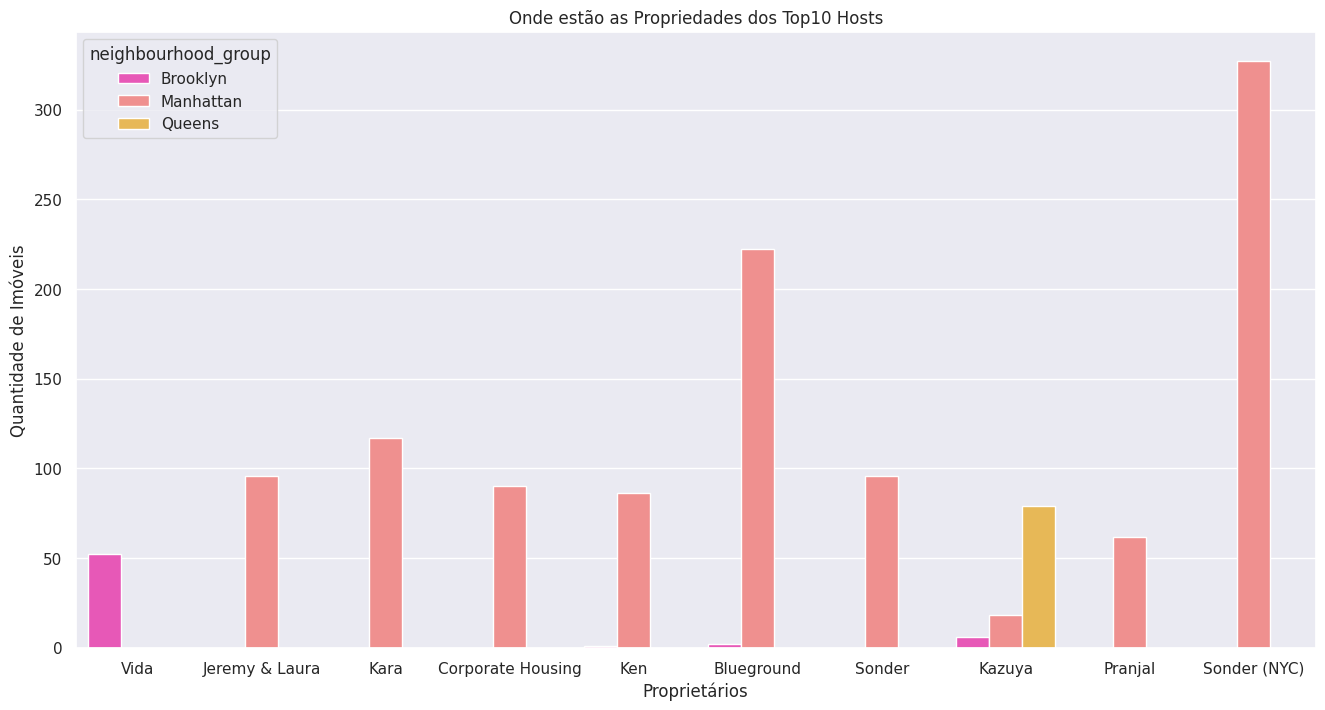

In [ ]:
# Count plot of the listings by neighbourhood
plt.figure(figsize=(16,8))
sns.countplot(x='host_name', data=df2, hue='neighbourhood_group', palette='spring')
plt.title('Onde estão as Propriedades dos Top10 Hosts')
plt.xlabel('Proprietários')
plt.ylabel('Quantidade de Imóveis')
plt.show()

Os top 10 Proprietarios tem seus imóveis na maioria em Manhattan, sendo provavelmente eles a razão de ser o lugar com mais imóveis de NYC.

##Quanto as pessoas estão pagando aos maiores Proprietários?

/tmp/ipython-input-1157539369.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='host_name', y='price', data=top10_mean, palette='spring')


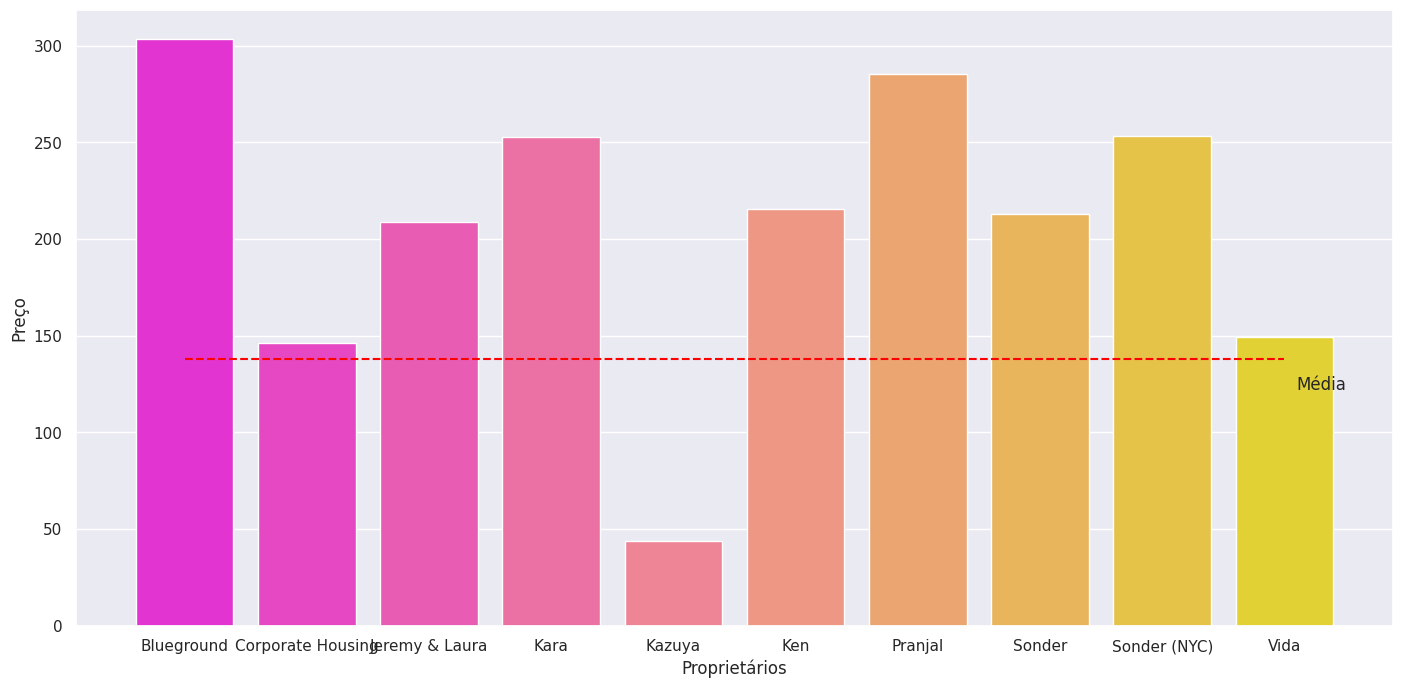

In [ ]:
# Primeiro vamos pegar a media de dólares dos top 10 recebidos por noite
top10_mean = df2.groupby('host_name').price.mean().reset_index()


# Barplot mostrando quanto as pessoas estão pagando para alugar com os top 10 Hosts
plt.figure(figsize=(17,8))
sns.barplot(x='host_name', y='price', data=top10_mean, palette='spring')

#incluso a media sem outliers(138 USD)
plt.xlabel('Proprietários')
plt.ylabel('Preço')
plt.plot([138, 138, 138, 138, 138, 138, 138, 138, 138, 138], color='red', linestyle='dashed')
plt.text(9.1,122,'Média')
plt.show()

Para os proprietarios do Top10, todos eles menos Kazuya, cobram os preços médios. A localização é geralmente o fator chave quando se trata de Imóveis.

##Validando a Teoria dos Top Hosts

Vamos criar uma segmentação de dados que separa o "Proprietário comum" do "Proprietario profissional".

In [82]:
# Criando a segmentação: Hosts com mais de 10 listagens são considerados 'Profissionais'
df_clean['host_type'] = df_clean['calculated_host_listings_count'].apply(
    lambda x: 'Profissional (Empresa)' if x > 10 else 'Individual'
)

# Agrupando para comparar a média de preços e a quantidade de imóveis
comparativo_hosts = df_clean.groupby('host_type')['price'].agg(['mean', 'count']).reset_index()
comparativo_hosts.columns = ['Tipo de Host', 'Preço Médio ($)', 'Quantidade de Imóveis']

# Exibindo a tabela de comparação
print("Comparativo de Mercado: Anfitriões Individuais vs. Profissionais")
display(comparativo_hosts)



Comparativo de Mercado: Anfitriões Individuais vs. Profissionais


Tipo de Host  Preço Médio ($)  Quantidade de Imóveis
0              Individual       134.907593                  44910
1  Profissional (Empresa)       191.417428                   2846

Uma hipótese abordada durante a exploração foi que os 'Top Hosts' (aqueles com maior volume de anúncios) não seriam pessoas físicas, mas sim empresas de gestão imobiliária.

Para validar isso, segmentei o dataset entre hosts individuais e profissionais (com mais de 10 imóveis).


/tmp/ipython-input-104062437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tipo de Host', y='Preço Médio ($)', data=comparativo_hosts, palette='spring')


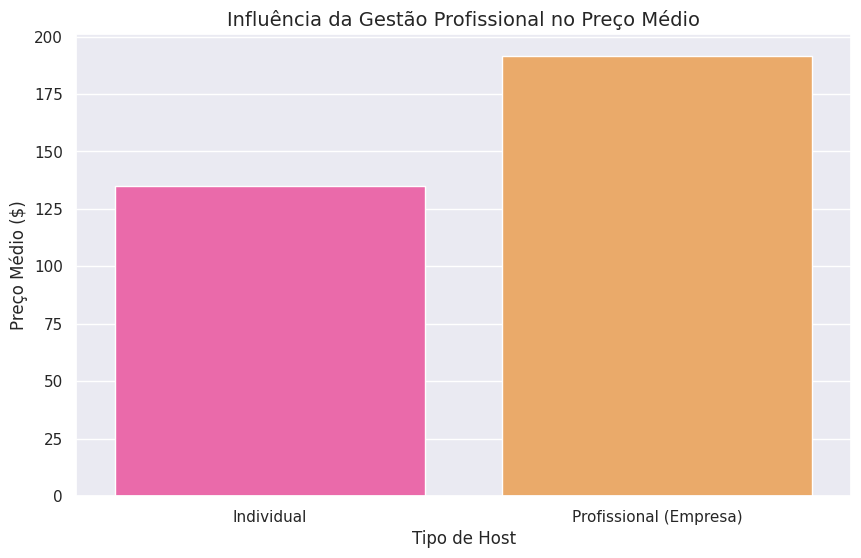

In [81]:
plt.figure(figsize=(10,6))
sns.barplot(x='Tipo de Host', y='Preço Médio ($)', data=comparativo_hosts, palette='spring')
plt.title('Influência da Gestão Profissional no Preço Médio', fontsize=14)
plt.show()

Os hosts profissionais mantêm um preço médio bem superior ao dos individuais, cerca de 57 $ maior. Isso indica que eles não apenas possuem mais imóveis, como também aplicam estratégias de precificação mais agressivas, focando em um público que aceita pagar pela padronização e conveniência do serviço profissional.

#REGRESSÃO LINEAR

No contexto do Airbnb, seria possivel fazer uma Regressão Linear?

O objetivo da regressão é: "Dado o bairro, o tipo de quarto e a quantidade de reviews, qual seria o preço justo desse imóvel?"

In [62]:
# Modelos de ML não leem texto como "Brooklyn" ou "Private room".
# Precisa transformar essas categorias em números usando One-Hot Encoding (Dummies).

# Selecionando colunas relevantes para o modelo
colunas_modelo = ['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'price']
df_ml = df_clean[colunas_modelo].copy()

# Transformando categorias em números (0 e 1)
df_ml = pd.get_dummies(df_ml, columns=['neighbourhood_group', 'room_type'])

In [66]:
from sklearn.model_selection import train_test_split

# Features (variáveis independentes)
# Variável que você usa para fazer a previsão
# Get all columns except 'price' for features
x = df_ml.drop('price', axis=1)

# Target (variável dependente)
# Variável que você quer prever
y = df_ml['price']

# Dividir em treino e teste (80% treino, 20% teste)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [67]:
#Importar modulo para treinar o modelo
from sklearn.linear_model import LinearRegression

# Criar modelo
modelo = LinearRegression()

#treinar modelo
modelo.fit(x_train, y_train)



LinearRegression()

In [68]:
#Testar modelos usando os dados separados para teste
previsoes = modelo.predict(x_test)
print(previsoes)

[167.14793204 163.30528648 101.94056516 ... 106.86760003 120.57122651
 221.2164649 ]


In [72]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, r2_score

#MAE (Erro Médio Absoluto): Diz em média quantos dólares o modelo erra (pra cima ou pra baixo).
print(f"Erro Médio Absoluto: ${mean_absolute_error(y_test, previsoes):.2f}")

#R2 Score: Diz o quanto o seu modelo explica a variação dos preços (vai de 0 a 1).
print(f"R^2 Score: {r2_score(y_test, previsoes):.2f}")

Erro Médio Absoluto: $53.62
R^2 Score: 0.32


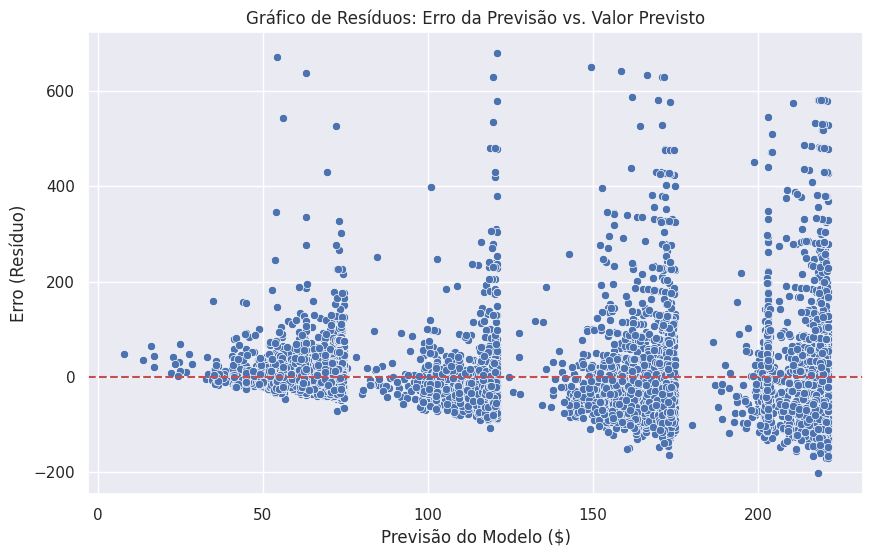

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculando os erros
residuos = y_test - previsoes

plt.figure(figsize=(10,6))
sns.scatterplot(x=previsoes, y=residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Resíduos: Erro da Previsão vs. Valor Previsto')
plt.xlabel('Previsão do Modelo ($)')
plt.ylabel('Erro (Resíduo)')
plt.show()

###**Conclusão da Regressão Linear**
Ao avançar para a modelagem preditiva, os resultados confirmaram o que a nossa análise exploratória já sinalizava. Como observado anteriormente no Mapa de Calor (Heatmap), as correlações entre as variáveis independentes (bairros, tipos de quarto) e a variável dependente (preço) apresentaram valores muito baixos.

Matematicamente, isso já indicava que uma Regressão Linear enfrentaria dificuldades, o que foi comprovado pelo R2 de 0.32(muito distante de 1.00). Esse valor nos diz que o modelo explica apenas 32% da variação dos preços em Nova York.
**Mas o que isso significa para o negócio?** Significa que o mercado imobiliário de NY é extremamente complexo. O preço não é definido apenas por 'onde' e 'que tipo de quarto'. Existem camadas invisíveis nos dados, como:

   - Fatores Subjetivos: Decoração, se o dono é simpático, vista para o Central Park ou proximidade de pontos turisticos e de linhas do metrô.

   - Efeito de Nicho: Imóveis de luxo (outliers que foi removido da média) seguem uma lógica de preço completamente diferente dos imóveis mais baratos.

   Portanto, para uma precisão maior em um próximo passo, seria necessário o uso de algoritmos não-lineares (como Random Forest) ou a incorporação de novas fontes de dados (feature engineering), como a distância até pontos turísticos."

## Conclusão e Insights de Negócio

Após uma exploração profunda do conjunto de dados do Airbnb em Nova York, cruzando variáveis de preço, localização e comportamento dos anfitriões, chegamos a insights estratégicos sobre como esse mercado opera na cidade mais influente do mundo.

**1. O Contexto Econômico e Geográfico**

Nova York não é apenas um destino turístico, é o centro financeiro global. Isso explica a densidade esmagadora de imóveis em **Manhattan (44%)** e **Brooklyn (41%)**. Nossa análise mostrou que a "Manhattanização" do Airbnb é real: a ilha concentra os preços mais altos devido à demanda inelástica por localizações próximas a marcos como a Times Square e o distrito financeiro. O Brooklyn, por sua vez, atua como uma zona de suporte, absorvendo a demanda excedente com preços ligeiramente mais competitivos, mas ainda elevados pela proximidade com a ilha.

**2. O Perfil do Consumidor e a "Economia da Privacidade"**

Identificamos que o *sweet spot* (faixa ideal) de preços para o consumidor médio gira em torno de **130 a 150 USD**.
Um dado crucial foi revelado na análise de tipos de quarto: apesar da preferência por **Apartamentos Inteiros (52%)**, existe um mercado gigantesco e aquecido para **Quartos Privados (45%)**. Isso indica um perfil de viajante (seja turista solo ou profissional júnior) que busca a localização premium de Manhattan, mas está disposto a abrir mão de espaço total para caber no orçamento.

**3. Análise da Oferta: O Fenômeno dos "Super Proprietários"**

Ao analisar os Top 10 Anfitriões, desmistificamos a ideia do "anfitrião casual".
Estes 10 maiores proprietários possuem centenas de listagens concentradas estrategicamente em Manhattan. O dado mais interessante é que, diferentemente da média geral (que busca alta rotatividade de 2 a 5 dias), esses grandes players focam em estadias ligeiramente mais longas e preços acima da média.

**4. Sensibilidade ao Preço e Reviews:**

  Detectamos uma **correlação negativa** entre preço e quantidade de reviews. Imóveis mais baratos tendem a ter maior rotatividade e engajamento.
    * *Risco:* Imóveis muito caros tendem a ficar ociosos. É necessário incentivar reviews nesses segmentos para gerar prova social.

**5. Limpeza de Dados e Realidade de Mercado:**

  Identificamos que a média de preços bruta 152 USD estava inflacionada por outliers (imóveis de até 10.000 USD). A média real para o consumidor padrão gira em torno de **138$**. Além disso, a maioria dos usuários busca estadias curtas (média de 5 dias), o que favorece a alta rotatividade.

**6. Limitação da Predição Linear:**

  Como antecipado pelo nosso Heatmap, a correlação entre as variáveis básicas (bairro/tipo de quarto) e o preço é baixa, resultando em um R2 de 0.32. Isso prova que o mercado de NY é movido por variáveis 'invisíveis' (luxo, proximidade específica de hubs e design), exigindo modelos mais complexos para precificação automática.

**7. Estratégia Corporativa:**

  Para o segmento de negócios, a Airbnb deve focar em parcerias com esses 'Top Hosts', garantindo um padrão 'hotel-like' que executivos exigem.

**Conclusão:**

É altamente provável que esses "Top Hosts" sejam, na verdade, empresas de gestão imobiliária focadas em **aluguéis corporativos (Business Travel)**. Eles não vendem apenas uma cama, vendem conveniência, padronização e localização para executivos, operando quase como redes hoteleiras distribuídas.

**Resumo Final:**
Para ter sucesso no Airbnb em NY, a localização (bairro) dita o preço base, mas a estratégia de *pricing* deve variar conforme o público:
* **Turismo:** Alta rotatividade, preço competitivo ($100-$140), foco em reviews.
* **Corporativo:** Estadias médias, preço premium (+$180), foco em gestão profissional (como fazem os Top 10).